In [3]:
# Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm

In [4]:
# Generate data
n = 200
x = np.linspace(0,10,n)
slope = 5
intercept = 2
noise = np.random.normal(scale=6, size=n)
y = intercept + slope*x + noise
data = dict(x=x, y=y)

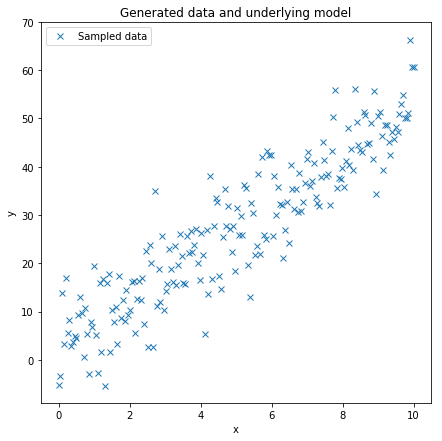

In [5]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='Sampled data')
plt.legend(loc=0)
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
x_ = np.array(x)
x_ = x_.reshape(-1,1)
y_ = np.array(y)
y_ = y_.reshape(-1,1)
reg = lr.fit(x_,y_)
reg.score(x_,y_)

0.8364725212540555

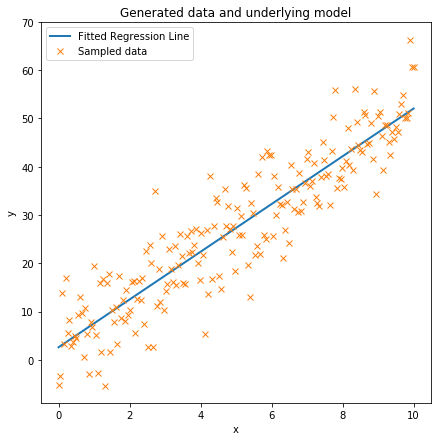

In [7]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x,lr.predict(x_), label="Fitted Regression Line", lw=2.)
ax.plot(x, y, 'x', label='Sampled data')
plt.legend(loc=0)
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x, Intercept, sigma]
Sampling 4 chains: 100%|██████████| 14000/14000 [00:04<00:00, 3061.00draws/s]


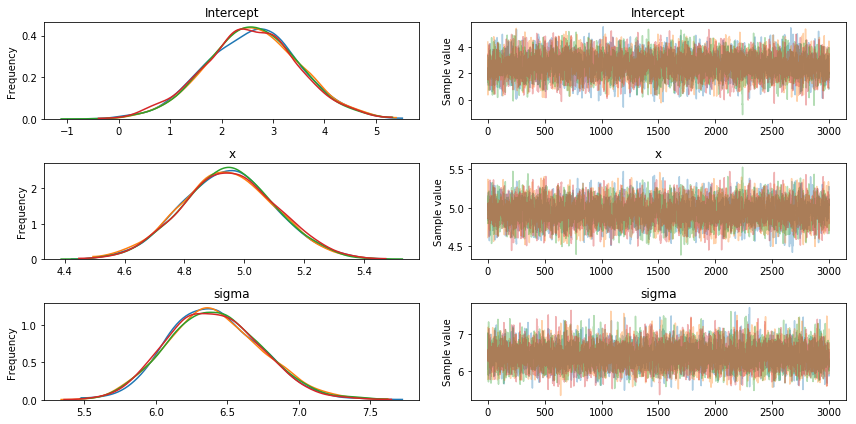

In [8]:
with pm.Model() as model:
     # Define priors
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1.)
    intercept = pm.Normal('Intercept', 0, sd=20)
    x_coeff = pm.Normal('x', 0, sd=20)

    # Define likelihood
    likelihood = pm.Normal('y', mu=intercept + x_coeff * x,
                        sd=sigma, observed=y)

    # Inference!
    trace = pm.sample(3000)
    
pm.traceplot(trace)
plt.show()


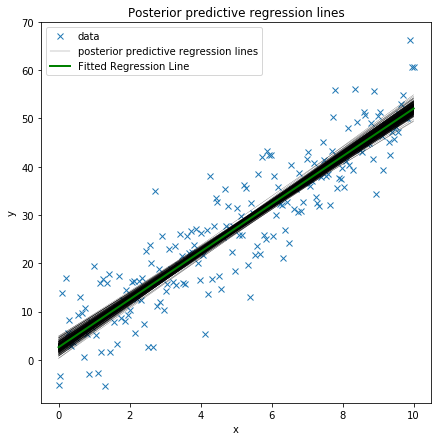

In [9]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'x', label='data')
pm.plot_posterior_predictive_glm(trace, samples=300,
                              label='posterior predictive regression lines',eval=np.linspace(0,10,200))
plt.title('Posterior predictive regression lines')
plt.plot(x,lr.predict(x_), label="Fitted Regression Line", lw=2.,color='green')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

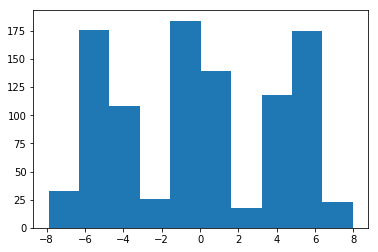

In [10]:
# simulate data from a known mixture distribution
np.random.seed(12345) # set random seed for reproducibility

k = 3
ndata = 1000
spread = 5
centers = np.array([-spread, 0, spread])

# simulate data from mixture distribution
v = np.random.randint(0, k, ndata)
data = centers[v] + np.random.randn(ndata)

plt.hist(data)
plt.show()


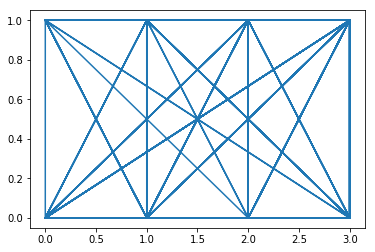

In [14]:
y1 = np.random.randint(2, size=200)
x1 = np.random.randint(4, size=200)
plt.plot(x1,y1)
plt.show()

In [28]:
data = dict(x=x1, y=y1)
df = pd.DataFrame(data=data)
df.head(5)

,x,y
0,3,1
1,3,0
2,3,0
3,2,0
4,2,1


In [17]:
with pm.Model() as log_model:
    pm.glm.GLM.from_formula('y ~ x', data, family=pm.glm.families.Binomial())
    trace = pm.sample(4000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x, Intercept]
Sampling 4 chains: 100%|██████████| 18000/18000 [00:04<00:00, 3865.15draws/s]
The acceptance probability does not match the target. It is 0.8855763462100347, but should be close to 0.8. Try to increase the number of tuning steps.


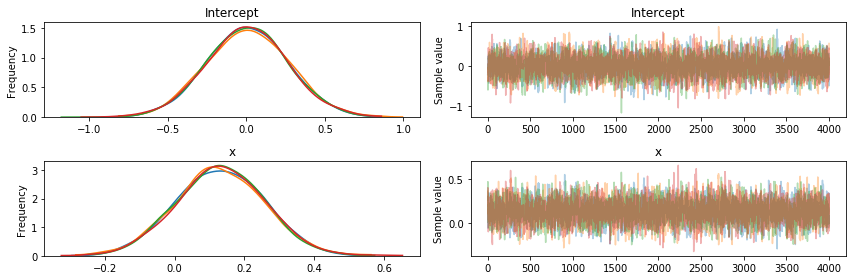

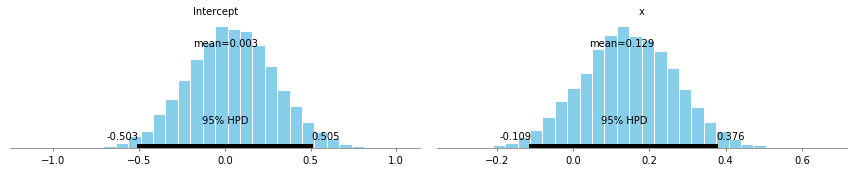

In [19]:
pm.traceplot(trace)
pm.plot_posterior(trace)
plt.show()

In [24]:
with log_model:
    inference = pm.ADVI()
    approx = pm.fit(n=30000, method=inference)

Average Loss = 147.47: 100%|██████████| 30000/30000 [00:07<00:00, 3803.33it/s]
Finished [100%]: Average Loss = 147.47


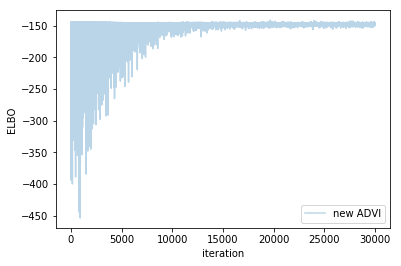

In [25]:
plt.plot(-inference.hist, label='new ADVI', alpha=.3)
plt.legend()
plt.ylabel('ELBO')
plt.xlabel('iteration')
plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x1c249be2b0>, GridSpec(1, 1))

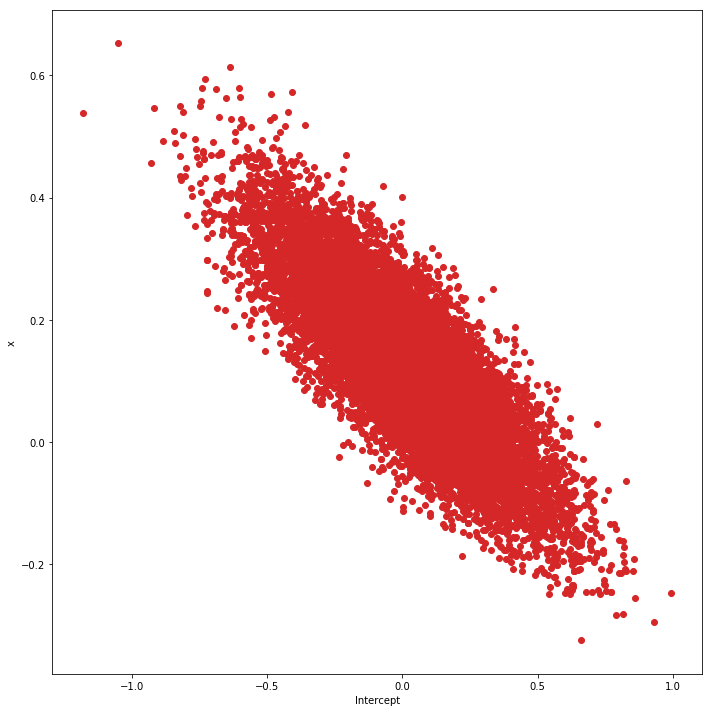

In [30]:
pm.pairplot(trace,divergences=True,
            color='C3',
            kwargs_divergence={'color': 'C2'})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c26b31630>,
      dtype=object)

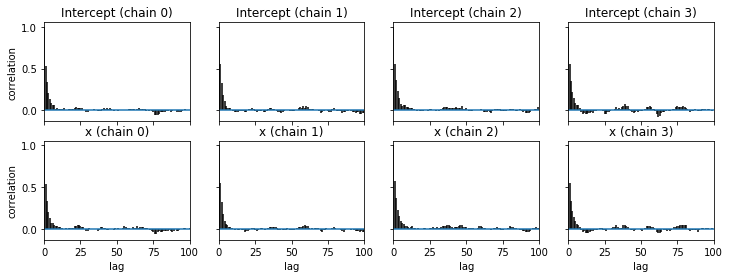

In [31]:
pm.autocorrplot(trace)

GridSpec(1, 2, width_ratios=[3, 1])

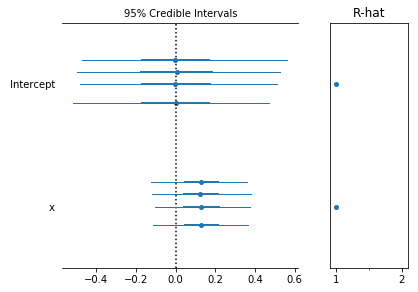

In [32]:
pm.forestplot(trace)